[View in Colaboratory](https://colab.research.google.com/github/78526Nasir/Research-Work/blob/master/Outliers_Detection.ipynb)

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.datasets import load_iris

%matplotlib inline

In [0]:
rcParams["figure.figsize"] = 10,6

In [0]:
iris_dataset = load_iris()

In [0]:
df = pd.DataFrame(data = np.c_[iris_dataset['data'], iris_dataset['target']], columns = iris_dataset["feature_names"] + ["target"])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1:]

### Identify Outliers using Turkey BoxPlots

[]

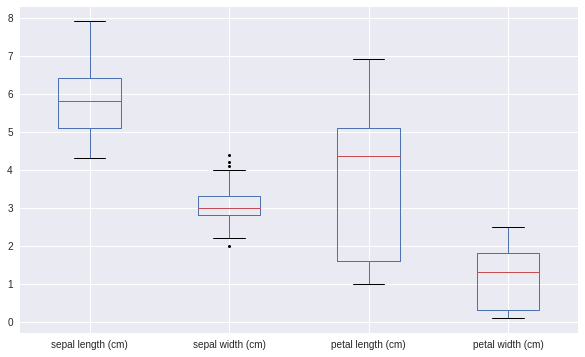

In [7]:
X.boxplot(sym="k.")
plt.plot()

### Outlier! Sepal width contains outliers!
### Removing the Outlier by replacing with median value:

In [0]:
outlier = X["sepal width (cm)"] > 4
outlier2 = X["sepal width (cm)"] < 2.05

median = X["sepal width (cm)"].median()


In [0]:
X.loc[X["sepal width (cm)"] > 4, "sepal width (cm)"] = median
X.loc[X["sepal width (cm)"] < 2.05, "sepal width (cm)"] = median

[]

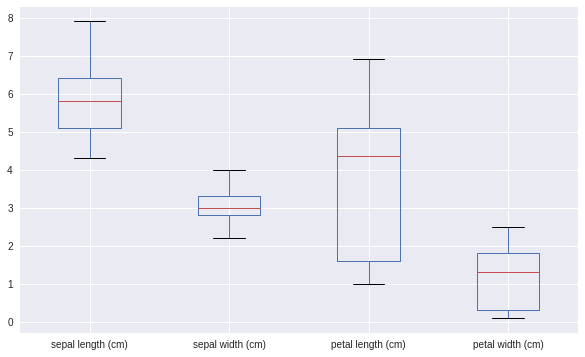

In [11]:
X.boxplot(sym="k.")
plt.plot()